In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')
# 問題1, 2, 3, 4, 5
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if not self.no_bias:
            # 全データの最初のカラムに1を追加
            bias = np.ones((X.shape[0], 1))
            X = np.hstack((bias, X))
            bias = np.ones((X_val.shape[0], 1))
            X_val = np.hstack((bias, X_val))
            
        n_features = X.shape[1]
        # thetaの初期値は全て1
        self.theta = np.ones((n_features, 1))

        for i in range(self.iter):
            pred_y = self._linear_hypothesis(X)
            self.loss[i] = self._loss_func(pred_y, y)
            pred_y_val = self._linear_hypothesis(X_val)
            self.val_loss[i] = self._loss_func(pred_y_val, y_val)
            
            self._gradient_descent(X, y)

            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print("{}回目の学習の損失: {} (学習), {} (テスト)".format(i,  self.loss[i], self.val_loss[i]))

    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        return X @ self.theta

    def _gradient_descent(self, X, y):
        """
        最急降下法

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        n_samples = X.shape[0]
        n_features = X.shape[1]
        hypo_y = self._linear_hypothesis(X)
        for j in range(n_features):
            gradient = 0
            for i in range(n_samples):
                gradient += (hypo_y[i] - y[i]) * X[i, j]
            self.theta[j] = self.theta[j] - (self.lr * (1 / n_samples)) * gradient

    def MSE(self, y_pred, y):
        """
        平均二乗誤差の計算

        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値

        Returns
        ----------
        mse : numpy.float
          平均二乗誤差
        """
        n_samples = y.shape[0]
        mse = (1 / n_samples) * ((y_pred - y) ** 2).sum()
        return mse
    
    def _loss_func(self, y_pred, y):
        """
        損失関数計算

        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値

        Returns
        ----------
        loss : numpy.float
          損失値
        """
        return MSE(y_pred, y) / 2
    
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        if not self.no_bias:
            bias = np.ones((X.shape[0], 1))
            X = np.hstack((bias, X))
        return self._linear_hypothesis(X)
    
    
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    n_samples = y.shape[0]
    mse = (1 / n_samples) * ((y_pred - y) ** 2).sum()
    return mse

In [2]:
# 動作確認用サンプル
sample_X_train = np.array([[1,2], [2,4]])
sample_X_test = np.array([[3,4], [5,5]])
sample_y_train = np.array([[2], [3]])
sample_y_test = np.array([[4], [5]])
slr = ScratchLinearRegression(num_iter=5, lr=0.01, no_bias=False, verbose=True)
slr.fit(sample_X_train, sample_y_train, sample_X_test, sample_y_test)

0回目の学習の損失: 5.0 (学習), 13.0 (テスト)
1回目の学習の損失: 3.749825000000001 (学習), 9.736199999999997 (テスト)
2回目の学習の損失: 2.8123940262500002 (学習), 7.291549941250002 (テスト)
3回目の学習の損失: 2.1094706791620785 (学習), 5.460780415548655 (テスト)
4回目の学習の損失: 1.5823902659655935 (学習), 4.090018183085837 (テスト)


In [3]:
# 予測値プロット
def display_graph(X_test, y_test, y_pred, model_name):
    plt.scatter(X_test[:,0], y_test, label="actual")
    plt.scatter(X_test[:,0], y_pred, label="predicted", color='r')
    plt.title('{} GrLivArea'.format(model_name))
    plt.legend()
    plt.show()
    plt.scatter(X_test[:,1], y_test, label="actual")
    plt.scatter(X_test[:,1], y_pred, label="predicted", color='r')
    plt.title('{} GrLivArea'.format(model_name))
    plt.legend()
    plt.show()

In [4]:
# 問題6
from sklearn.model_selection import train_test_split
dataset = pd.read_csv("data/housing/train.csv")
X = dataset.loc[:, ['GrLivArea', 'YearBuilt']]
y = dataset.loc[:, ['SalePrice']]
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [5]:
# 標準化しないで検証
from sklearn.preprocessing import StandardScaler
slr = ScratchLinearRegression(num_iter=10, lr=0.01, no_bias=False, verbose=True)
slr.fit(X_train, y_train, X_test, y_test)

0回目の学習の損失: 18588830791.047943 (学習), 19964865005.30137 (テスト)
1回目の学習の損失: 6.507797641436254e+19 (学習), 6.7023228264521515e+19 (テスト)
2回目の学習の損失: 2.546348425959923e+29 (学習), 2.6199166242889907e+29 (テスト)
3回目の学習の損失: 9.96342714918801e+38 (学習), 1.0251040200033223e+39 (テスト)
4回目の学習の損失: 3.89851917191134e+48 (学習), 4.0110548488939375e+48 (テスト)
5回目の学習の損失: 1.5254240841310474e+58 (学習), 1.5694573523910415e+58 (テスト)
6回目の学習の損失: 5.968724363887709e+67 (学習), 6.14101903284463e+67 (テスト)
7回目の学習の損失: 2.33546007976928e+77 (学習), 2.402876046170291e+77 (テスト)
8回目の学習の損失: 9.138257107659819e+86 (学習), 9.402044290093515e+86 (テスト)
9回目の学習の損失: 3.575644203430147e+96 (学習), 3.67885963047448e+96 (テスト)


このまま続けるとオーバーフローしてしまう

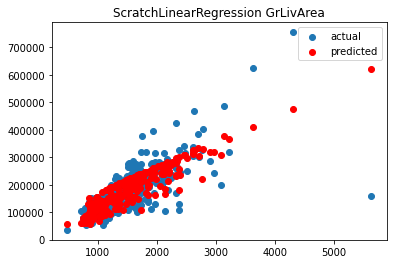

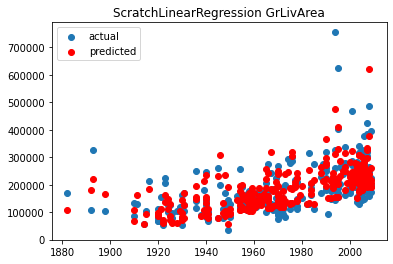

In [6]:
# 標準化して実行
from sklearn.preprocessing import StandardScaler
slr = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=False, verbose=False)
X_scaler = StandardScaler()
X_scaler.fit(X_train)
X_train_std = X_scaler.transform(X_train)
X_test_std = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_scaler.fit(y_train)
y_train_std = y_scaler.transform(y_train)
y_test_std = y_scaler.transform(y_test)

slr.fit(X_train_std, y_train_std, X_test_std, y_test_std)
y_pred = slr.predict(X_test_std)
display_graph(X_test, y_test, y_scaler.inverse_transform(y_pred), "ScratchLinearRegression")

mse: 32071.05760686879


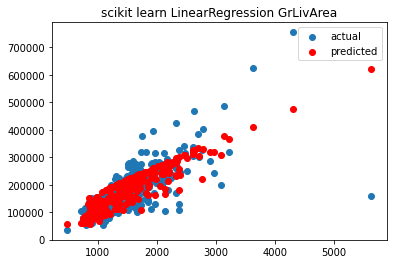

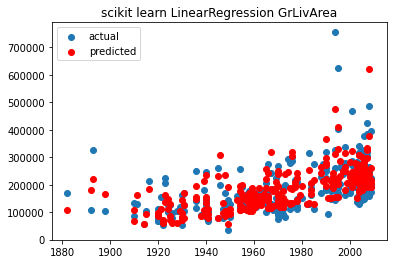

In [7]:
# scikit learnのLinearRegressionで検証
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("mse: {}".format(mean_absolute_error(y_test, y_pred)))
display_graph(X_test, y_test, y_pred, "scikit learn LinearRegression")

ScratchLinearRegressionと比べるとほぼ同じような予測をしているのがわかる

In [8]:
# 問題7 損失値の推移
def display_loss_graph(rl_model):
    iter_list = list(range(1, rl_model.iter + 1))
    plt.scatter(iter_list, rl_model.loss, label="train loss")
    plt.scatter(iter_list, rl_model.val_loss, label="test loss")
    plt.ylabel('loss')
    plt.xlabel('iter')
    plt.legend()
    plt.show()

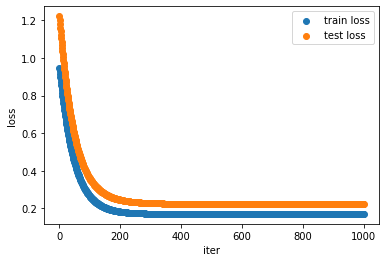

In [9]:
display_loss_graph(slr)

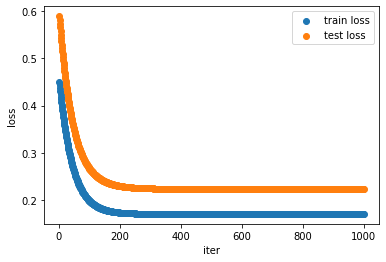

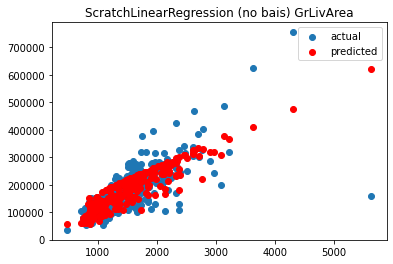

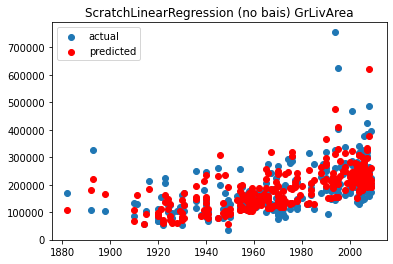

In [10]:
# 問題8　バイアス削除
from sklearn.preprocessing import StandardScaler
slr_without_bias = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=True, verbose=False)
X_scaler = StandardScaler()
X_scaler.fit(X_train)
X_train_std = X_scaler.transform(X_train)
X_test_std = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_scaler.fit(y_train)
y_train_std = y_scaler.transform(y_train)
y_test_std = y_scaler.transform(y_test)

slr_without_bias.fit(X_train_std, y_train_std, X_test_std, y_test_std)
y_pred = slr_without_bias.predict(X_test_std)
display_loss_graph(slr_without_bias)
display_graph(X_test, y_test, y_scaler.inverse_transform(y_pred), "ScratchLinearRegression (no bais)")

In [11]:
print("バイアスありのloss: {} ... {}".format(slr.loss[:5], slr.loss[-1]))
print("バイアスありのtheta: {}".format(slr.theta))
print("バイアスなしのloss: {}, ... {}".format(slr_without_bias.loss[:5], slr_without_bias.loss[-1]))
print("バイアスなしのtheta: {}".format(slr_without_bias.theta))

バイアスありのloss: [0.94940493 0.932999   0.91694093 0.90122328 0.8858388 ] ... 0.17041150919023088
バイアスありのtheta: [[4.31712474e-05]
 [6.30146001e-01]
 [4.12881250e-01]]
バイアスなしのloss: [0.44940493 0.442949   0.43664293 0.43048321 0.42446645], ... 0.17041150823943166
バイアスなしのtheta: [[0.630146  ]
 [0.41288125]]


#### 考察

バイアスがない方が早めに初期のlossも少なかった。
最終的には、バイアス値にかかるthetaが4.31712474e-05と微小になったため収束値は同じくらいになったと思われる。
バイアスは、目的関数の切片だと考えると、ない場合全ての項目値が0の点を通る関数になるため、そこを通らない方が最適な場合はバイアスを調整する必要があると思われる。例えば単回帰の場合, (x, y)が(0,2), (1,1) というデータがあったとすると y=(-1 * x) + 2が最適な関数だが、それを引くにはバイアスが2である必要がある。ただし、最急降下法によって最適なバイアスに近づけるのではあるが、最適なバイアスは最初から分かるものではないため、適当に設定した場合、初期の損失関数は悪くなることもあるし、よくなることもある。
また、今回はxの値を全て標準化したため、値が0付近に集まったため、バイアスがない方が損失関数が初期から良い値となり、最終的にはバイアスが0に近くなるように最適化されたと考えられる。

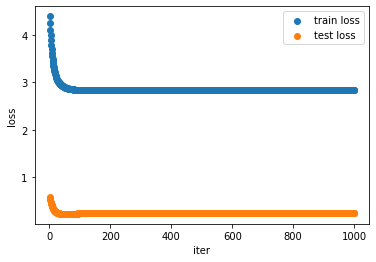

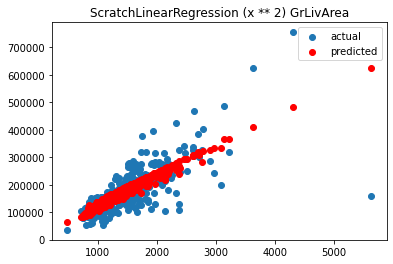

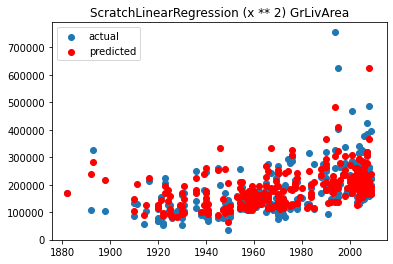

In [12]:
# 問題9

# 2乗するケース
from sklearn.preprocessing import StandardScaler
slr_square = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=True, verbose=False)
X_scaler = StandardScaler()
X_scaler.fit(X_train)
X_train_std = X_scaler.transform(X_train)
X_test_std = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_scaler.fit(y_train)
y_train_std = y_scaler.transform(y_train)
y_test_std = y_scaler.transform(y_test)

X_train_std = X_train_std ** 2
y_train_std = y_train_std ** 2

slr_square.fit(X_train_std, y_train_std, X_test_std, y_test_std)
y_pred = slr_square.predict(X_test_std)
display_loss_graph(slr_square)
display_graph(X_test, y_test, y_scaler.inverse_transform(y_pred), "ScratchLinearRegression (x ** 2)")

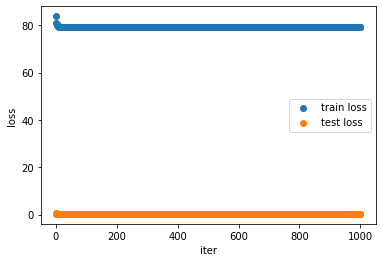

In [13]:
# 3乗するケース
from sklearn.preprocessing import StandardScaler
slr_cubed = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=True, verbose=False)
X_scaler = StandardScaler()
X_scaler.fit(X_train)
X_train_std = X_scaler.transform(X_train)
X_test_std = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_scaler.fit(y_train)
y_train_std = y_scaler.transform(y_train)
y_test_std = y_scaler.transform(y_test)

X_train_std = X_train_std ** 3
y_train_std = y_train_std ** 3

slr_cubed.fit(X_train_std, y_train_std, X_test_std, y_test_std)
y_pred = slr_cubed.predict(X_test_std)
display_loss_graph(slr_cubed)
# display_graph(X_test, y_test, y_scaler.inverse_transform(y_pred), "ScratchLinearRegression (x ** 3)")

学習途中で発散した。発散しない値で回数を調整して再検証

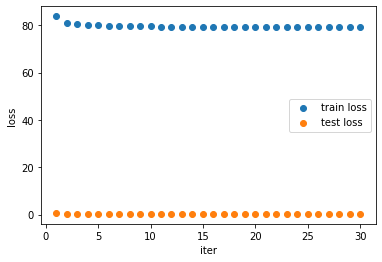

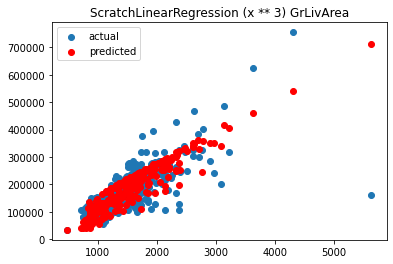

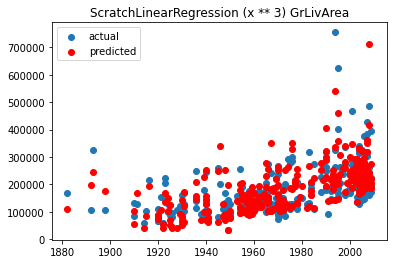

In [14]:
# 3乗するケース
from sklearn.preprocessing import StandardScaler
slr_cubed = ScratchLinearRegression(num_iter=30, lr=0.01, no_bias=True, verbose=False)
X_scaler = StandardScaler()
X_scaler.fit(X_train)
X_train_std = X_scaler.transform(X_train)
X_test_std = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_scaler.fit(y_train)
y_train_std = y_scaler.transform(y_train)
y_test_std = y_scaler.transform(y_test)

X_train_std = X_train_std ** 3
y_train_std = y_train_std ** 3

slr_cubed.fit(X_train_std, y_train_std, X_test_std, y_test_std)
y_pred = slr_cubed.predict(X_test_std)
display_loss_graph(slr_cubed)
display_graph(X_test, y_test, y_scaler.inverse_transform(y_pred), "ScratchLinearRegression (x ** 3)")

In [15]:
display("今回試した方法を比較")

pd.DataFrame(
    [slr.loss[-1], slr_without_bias.loss[-1], slr_square.loss[-1], slr_cubed.loss[-1]],
    index=['バイアスあり', 'バイアスなし', 'x ** 2(バイアスなし)', 'x ** 3(バイアスなし)'],
    columns=['loss']
 )
# ).T.sort_values(["Linear Regression"], ascending=False)

'今回試した方法を比較'

,loss
バイアスあり,0.170412
バイアスなし,0.170412
x ** 2(バイアスなし),2.831620
x ** 3(バイアスなし),79.251111


3乗は発散してしまい、2乗は最終的な損失関数は2乗しない場合に比べて高い値なのだが、学習はプロットから見るに同じくらいの制度で実現できつつ、損失関数の収束も早くなったように思える。

#### 問題10 局所最適解の問題
目的関数

$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2
$$

微分すると
$$
\frac{\partial L(\theta)}{\partial \theta_j} = \frac{1}{m} \frac{\partial}{\partial \theta_j} \sum_{i=1}^{m} [(h_\theta(x^{(i)}))^2 - 2 h_\theta(x^{(i)}) y^{(i)} + (y^{(i)})^2 ]\\
= \frac{1}{m} \frac{\partial}{\partial \theta_j} \sum_{i=1}^{m} [(\theta^T \cdot x^{(i)})^2 - 2 (\theta^T \cdot x^{(i)}) y^{(i)} + (y^{(i)})^2 ]\\\\
= \frac{1}{m} \sum_{i=1}^{m}[(2 (\theta^T \cdot x^{(i)}) x_{j}^{(i)}) - 2 y^{(i)} x_{j}^{(i)})]\\
= \frac{1}{m} \sum_{i=1}^{m}[(2 h_\theta(x^{(i)})x_{j}^{(i)} - 2 y^{(i)} x_{j}^{(i)})]\\
= \frac{2}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)})x_{j}^{(i)}]\\
= \frac{ \alpha}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)})x_{j}^{(i)}]
$$



#### 問題11 局所最適解の問題

目的関数
$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2
$$
に代入する仮定関数
$$
h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... + \theta_j x_j + ... +\theta_n x_n   (x_0 = 1)
$$

で、これは各$\theta$が正の二次関数で局所最適値が一つのみなので学習を繰り返せば最適値が分かる。
反対に、仮定関数によっては目的関数に代入した際に局所最適値が複数ある場合があり、パラメータや最適化手法によって関数全体での最適でない方に収束してしまう可能性もある。